# How well (or bad) have the last Ecuadorian governments performed in terms of safety and security?

## Data: 
- Intentional homicides (Ministerio del Interior Ecuador): http://cifras.ministeriodelinterior.gob.ec/comisioncifras/inicio.php#
- Crime rate:
https://www.macrotrends.net/countries/ECU/ecuador/crime-rate-statistics

## Goal:
- Contrasting crime rates across last 3 ecuadorian government through visualization an public data

## Context:

On the verge of a new presidential election that takes place in the middle of an unprecedentedly deep social and political crisis, Ecuadorian citizens must choose between two candidates this 15th October: Luisa Gonzales, candidate for “Revolución Ciudadana” (former president Rafael Correa’s party) and Daniel Noboa, a young politician whose right-wing plan of government alongside his business background make his political profile similar to the one of the outgoing president Guillermo Lasso. The assassination of a presidential candidate, the dissolution of the congress by President Guillermo Lasso during his impeachment and the increasing presence of violent groups/cartels and their ties with the government are only a few of the reasons why safety and security are the main concern of Ecuadorian voters. This, in addition to the fact that the two candidates will likely handle the state in a similar manner as the groups they represent already did, the question of how these groups performed in the past is crucial. <br>
The first image handles intentional homicides (taken as a key indicator of the safety of a country by international standards) in Ecuador. Although data is not available prior 2010, a negative trend is evident during Rafael Correa’s government, reaching a minimum in 2016, his last year as a president. From that point on, during Moreno’s regime (who was elected as Correa’s candidate but ended up deserting the party and adopting Lasso’s plan of government) the trend becomes positive and increases dramatically during Lasso’s administration. The second image handles Ecuador’s overall crime rate per 100 k citizens. Conclusions are quite similar, only this time we get to see that for the first year of Correa’s presidency (2017) the crime rate increased, for it two have the same conduct later on under Moreno’s and Lasso’s regime as variable “intentional homicides” does.

In [4]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib.collections import LineCollection
from matplotlib.colors import BoundaryNorm, ListedColormap
import matplotlib.patches as mpatches

In [5]:
# functions for coloring: fillling points btw two points so colouring with cmap is more visible
def gen_points(xs, ys):
    return list(zip(xs, ys))

def calc_line_eq(point_1, point_2):
    x1 = point_1[0]
    y1 = point_1[1]
    x2 = point_2[0]
    y2 = point_2[1]
    # y = mx + c
    m = (y1-y2)/(x1-x2)
    c = (x1*y2 - x2*y1)/(x1-x2)
    return m,c

def fill_points_inbtw(point_1, point_2, step):
    x_1 = point_1[0]
    x_2 = point_2[0]
    m,c = calc_line_eq(point_1, point_2)
    points = []
    for x in np.arange(x_1, x_2, step):
        y = m * x + c
        points.append((x,y))
    return points

def return_all_points_inbtw(xs, ys, step):
    list_of_points = gen_points(xs, ys)
    final_x_list = []
    final_y_list = []
    for i in range(0, len(list_of_points)):
        if i == len(list_of_points) - 1:
            final_x_list.append(list_of_points[i][0])
            final_y_list.append(list_of_points[i][1])
            break
        else:
            points_inbtw = fill_points_inbtw(list_of_points[i], list_of_points[i+1], step)
            for point in points_inbtw:
                final_x_list.append(point[0])
                final_y_list.append(point[1])
    return final_x_list, final_y_list

    

In [6]:
def draw_colormapped_curve(x,y, steps):
    # color of curve depending on y-value       
    x, y = return_all_points_inbtw(x, y, steps) 
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(min(y), max(y))
    lc = LineCollection(segments, cmap='autumn_r', norm=norm)
    # Set the values used for colormapping
    lc.set_array(y)
    lc.set_linewidth(3)
    line = ax.add_collection(lc)
    #fig.colorbar(line, ax=ax)
    

## First data set: intentional homicides in Ecuador

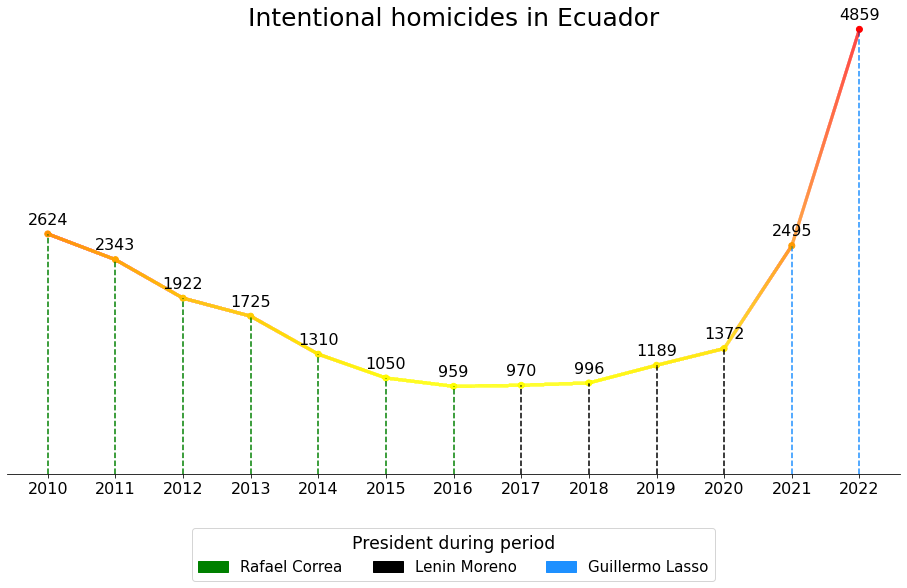

In [7]:
# intentional homicides in Ecuador
intentional_homicides_ec = pd.read_excel('homicidios_intencionales.xls', skiprows=[0,1,2,4])
# grouping by year
intent_homicides_ec = intentional_homicides_ec.groupby('AÑO').sum()
# casting year and sum to int
intent_homicides_ec.index = intent_homicides_ec.index.astype('int64')
intent_homicides_ec['# HOMICIDIOS'] = intent_homicides_ec['# HOMICIDIOS'].astype('int64')
intent_homicides_ec.drop(labels=[2023], inplace = True)

# set figure
fig, ax = plt.subplots(figsize =(16, 9));
plt.title('Intentional homicides in Ecuador', alpha=1, fontsize=25, x=0.5, y=0.95)

# draw lineplot
x = intent_homicides_ec.index.to_list()
y = intent_homicides_ec['# HOMICIDIOS'].to_list()
y_max = max(y)
norm = [i*10/max(y) for i in y]
plt.scatter(x, y,c = norm, cmap='autumn_r')

# write every y value for point
for xi,yi in zip(x,y):
    label = yi
    plt.annotate(label, (xi,yi), textcoords="offset points", xytext=(0,10), ha='center', fontsize=16)
    
    # Correa's government
    if xi in range (2007, 2017):
        plt.vlines(x = xi, ymin = 0, ymax = yi, linestyle='--', color = 'green')
    
    elif xi in range (2017, 2021):
        plt.vlines(x = xi, ymin = 0, ymax = yi, linestyle='--', color = 'k')
    
    elif xi in range (2021, 2023):
        plt.vlines(x = xi, ymin = 0, ymax = yi, linestyle='--', color = 'dodgerblue')
    
    
# legend settings
green_patch = mpatches.Patch(color='green', label='Rafael Correa')
black_patch = mpatches.Patch(color='k', label='Lenin Moreno')
blue_patch = mpatches.Patch(color='dodgerblue', label='Guillermo Lasso')
ax.legend(handles=[green_patch, black_patch, blue_patch], loc='upper center',
          bbox_to_anchor=(0.5, -0.05), prop={'size': 15}, ncol=5, 
          title="President during period", title_fontsize='xx-large')
# draw collormapped curve
draw_colormapped_curve(x,y, 0.0001)
    

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.spines[['bottom']].set_visible(True)
ax.spines['bottom'].set_position(('data',0))
plt.xticks(intent_homicides_ec.index, (str(s) for s in intent_homicides_ec.index), fontsize=16);



# remove the y label 
plt.yticks([])    

plt.show()

## Second data set: Crime rate

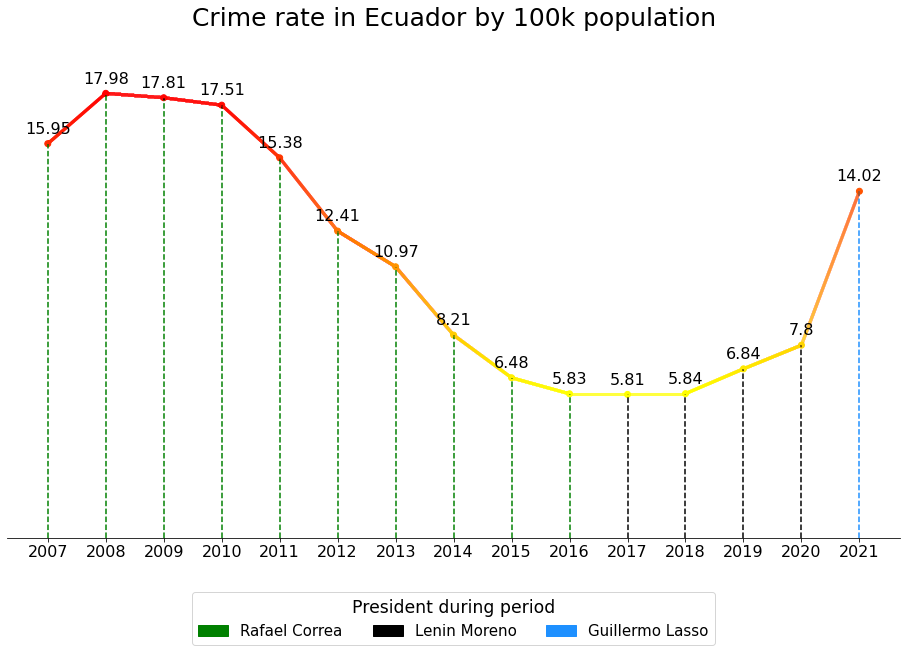

In [10]:
# second dataset
crime_rate_ec = pd.read_csv('ecuador-crime-rate-statistics.csv')
crime_rate_ec['date'] = pd.to_datetime(crime_rate_ec['date'], format='%Y-%m-%d')

# filter by year (from 2010 onwards)
filtered_df = crime_rate_ec.loc[crime_rate_ec['date'] >= '2007-12-31']

# set figure
fig, ax = plt.subplots(figsize =(16, 9));
plt.title('Crime rate in Ecuador by 100k population', alpha=1, fontsize=25, x=0.5, y=1.08)

# draw lineplot
x = [2007 + i for i in range (15)]

y = filtered_df[' Per 100K Population'].to_list()
y_max = max(y)
norm = [i*10/max(y) for i in y]
plt.scatter(x, y,c = norm, cmap='autumn_r')

# write every y value for point
for xi,yi in zip(x,y):
    label = round(yi, 2)
    plt.annotate(label, (xi,yi), textcoords="offset points", xytext=(0,10), ha='center', fontsize=16)
    
    # Correa's government
    if xi in range (2007, 2017):
        plt.vlines(x = xi, ymin = 0, ymax = yi, linestyle='--', color = 'green')
    
    elif xi in range (2017, 2021):
        plt.vlines(x = xi, ymin = 0, ymax = yi, linestyle='--', color = 'k')
    
    elif xi in range (2021, 2023):
        plt.vlines(x = xi, ymin = 0, ymax = yi, linestyle='--', color = 'dodgerblue')
    
    

# legend settings
green_patch = mpatches.Patch(color='green', label='Rafael Correa')
black_patch = mpatches.Patch(color='k', label='Lenin Moreno')
blue_patch = mpatches.Patch(color='dodgerblue', label='Guillermo Lasso')
ax.legend(handles=[green_patch, black_patch, blue_patch], loc='upper center',
          bbox_to_anchor=(0.5, -0.05), prop={'size': 15}, ncol=5, 
          title="President during period", title_fontsize='xx-large')



# draw collormapped curve
draw_colormapped_curve(x,y, 0.0001)
    
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.spines[['bottom']].set_visible(True)
ax.spines['bottom'].set_position(('data',0))
plt.xticks(x, (str(s) for s in x), fontsize=16);


# remove the y label 
plt.yticks([])    
plt.show()

